In [120]:
from sklearn import neighbors,svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import axes_style
import numpy as np
import math
import copy
import sklearn.preprocessing as preprocessing

In [121]:
columns = ["A1_Score", "A2_Score","A3_Score", "A4_Score","A5_Score","A6_Score" ,"A7_Score", "A8_Score","A9_Score", "A10_Score","Age","gender" ,"ethnicity" ,"jundice" ,"austim","contry_of_res","used_app_before","result","age_desc","relation","ASD"]
data=pd.read_csv('project_autism.csv', names=columns, sep=' *, *', na_values='?', engine='python')


In [122]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [123]:
data.shape

(704, 21)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
Age                702 non-null float64
gender             704 non-null object
ethnicity          609 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           609 non-null object
ASD                704 non-null object
dtypes: float64(1), int64(11), object(9)
memory usage: 115.6+ KB


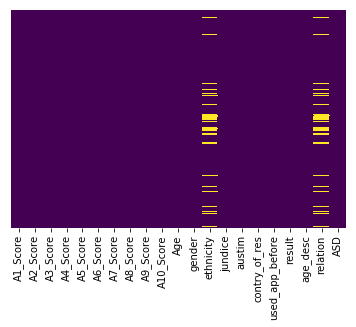

In [125]:
sns.heatmap(data.isnull(),yticklabels=False ,cbar=False,cmap='viridis')


In [126]:
data.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
Age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
ASD                 0
dtype: int64

In [127]:
numerical_attributes = data.select_dtypes(include=['int64'])
numerical_attributes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
0,1,1,1,1,0,0,1,1,0,0,6
1,1,1,0,1,0,0,0,1,0,1,5
2,1,1,0,1,1,0,1,1,1,1,8
3,1,1,0,1,0,0,1,1,0,1,6
4,1,0,0,0,0,0,0,1,0,0,2


In [128]:
data['result'].value_counts()

4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64

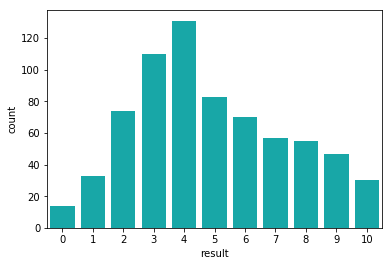

In [129]:
sns.countplot(x="result", data=data, color="c");


In [130]:
categorical_attributes = data.select_dtypes(include=['object'])
categorical_attributes.head()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,ASD
0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO


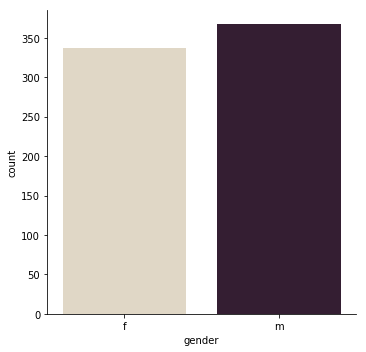

In [131]:
sns.catplot(x="gender", kind="count", palette="ch:.28", data=data);


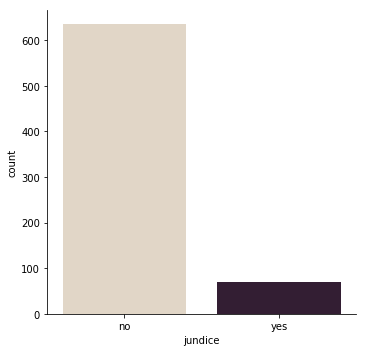

In [132]:
sns.catplot(x="jundice", kind="count", palette="ch:.25", data=data);

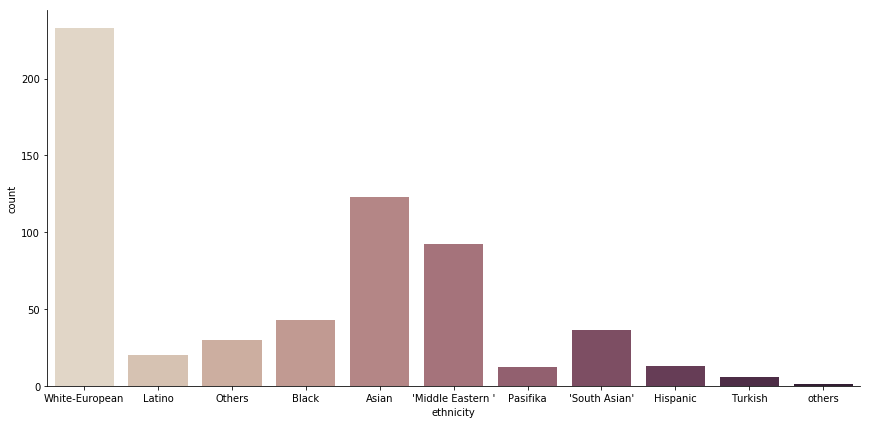

In [133]:
sns.catplot(x="ethnicity", kind="count", palette="ch:.25", data=data, height=6, aspect=2);

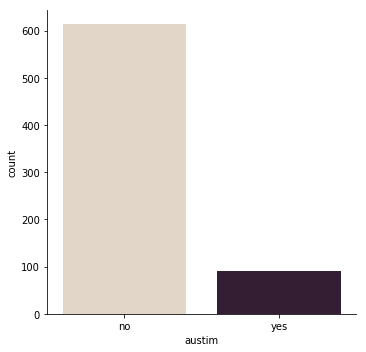

In [134]:
sns.catplot(x="austim", kind="count", palette="ch:.25", data=data);

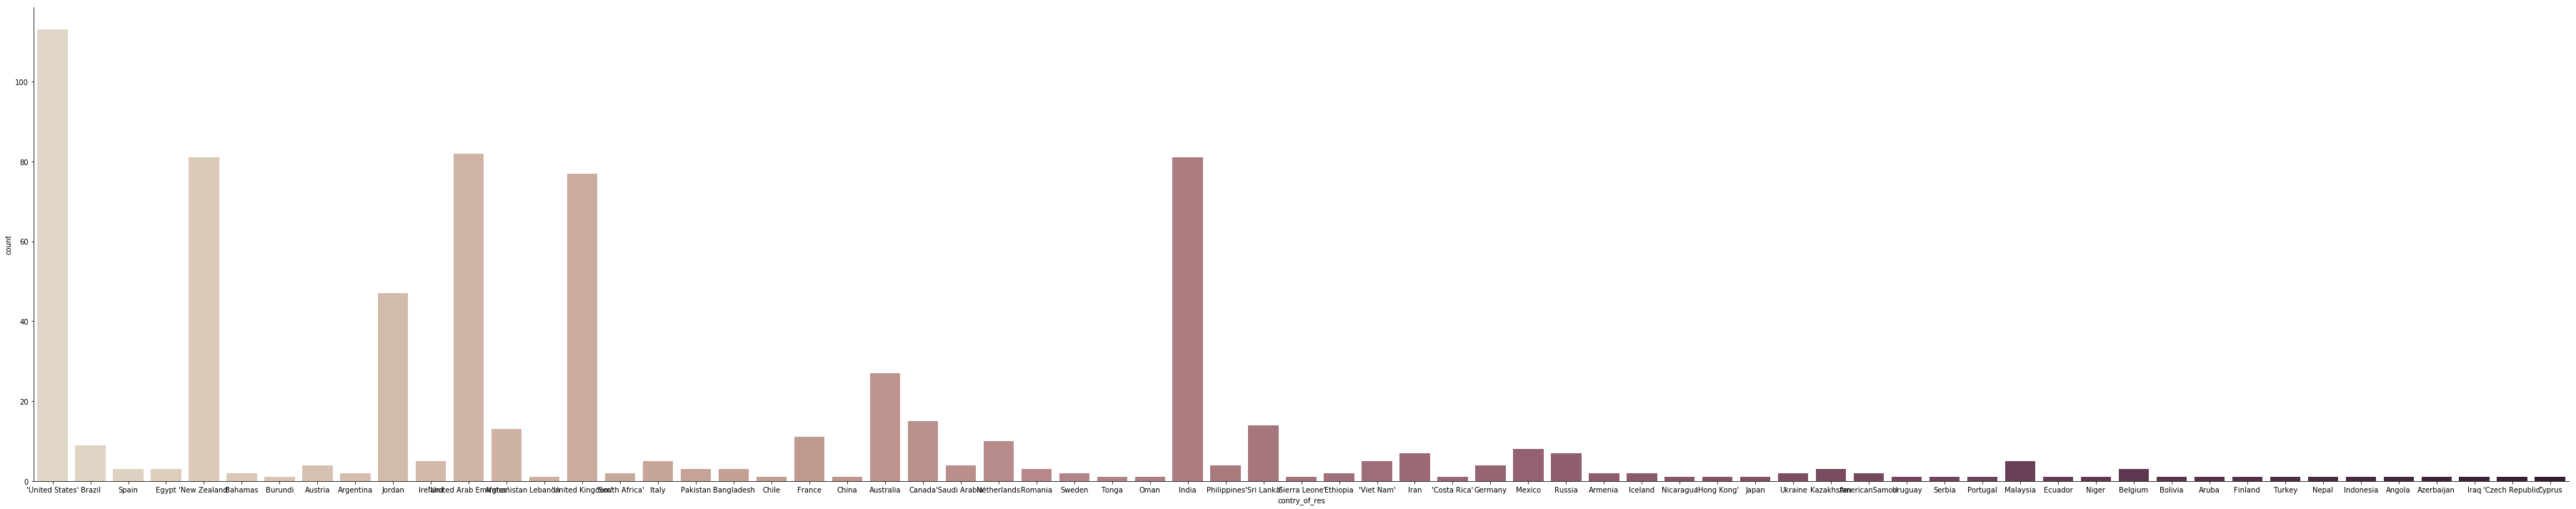

In [135]:
sns.catplot(x="contry_of_res", kind="count", palette="ch:.25", data=data, height=10, aspect=5);

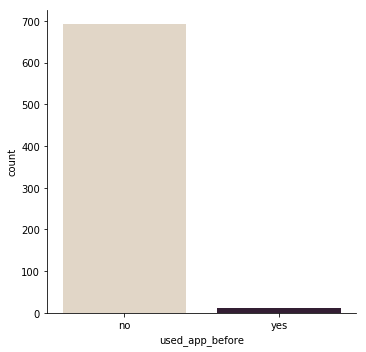

In [136]:
sns.catplot(x="used_app_before", kind="count", palette="ch:.25", data=data);

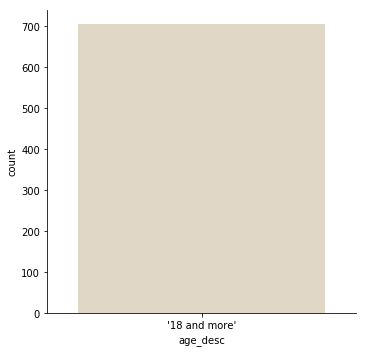

In [137]:
sns.catplot(x="age_desc", kind="count", palette="ch:.28", data=data);

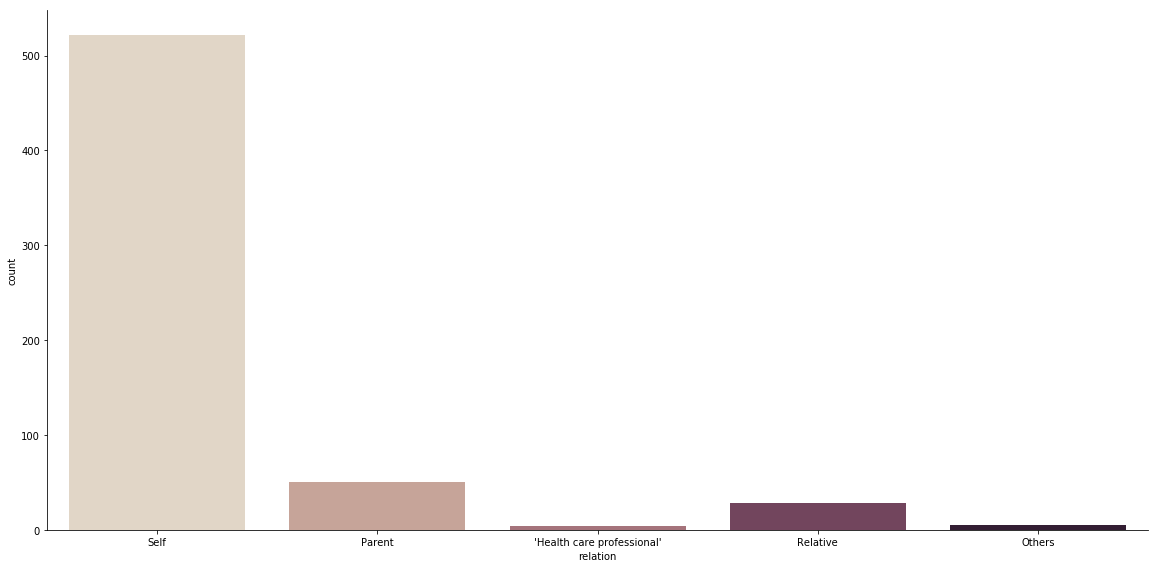

In [138]:
sns.catplot(x="relation", kind="count", palette="ch:.25", data=data, height=8, aspect=2);

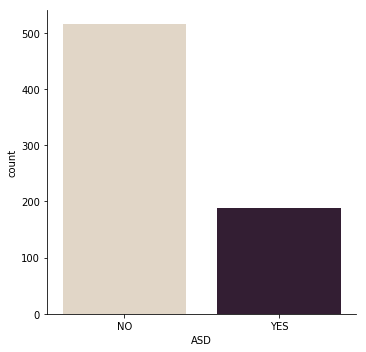

In [139]:
sns.catplot(x="ASD", kind="count", palette="ch:.25", data=data);

In [140]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


###### Handling Missing Values

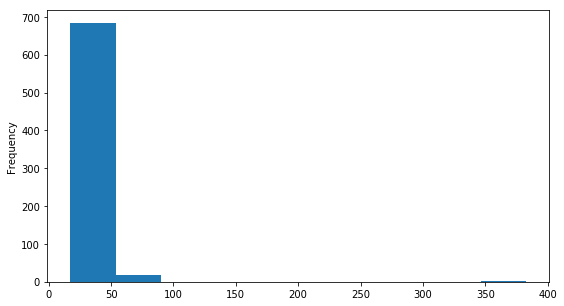

In [141]:
plt.figure(figsize = (9, 5)) 
data['Age'].plot(kind ="hist") 

In [142]:
data['Age'].value_counts()

21.0     49
20.0     46
23.0     37
22.0     37
19.0     35
24.0     34
27.0     31
18.0     31
30.0     30
26.0     28
25.0     27
29.0     27
28.0     24
31.0     21
32.0     18
17.0     18
35.0     17
37.0     17
40.0     16
33.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
46.0      6
53.0      6
55.0      6
50.0      5
52.0      5
45.0      4
48.0      4
41.0      3
49.0      3
54.0      2
61.0      2
56.0      2
58.0      2
64.0      1
59.0      1
60.0      1
51.0      1
383.0     1
Name: Age, dtype: int64

In [143]:
data['Age'].fillna(21, inplace=True)
data['ethnicity'].fillna('White-European', inplace=True)
data['relation'].fillna('Self', inplace=True)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
Age                704 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           704 non-null object
ASD                704 non-null object
dtypes: float64(1), int64(11), object(9)
memory usage: 115.6+ KB


###### --Missing Values Handled

###### Duplicate data

In [145]:
data.shape

(704, 21)

In [146]:
data =data.drop_duplicates(keep='first')

In [147]:
data.shape

(699, 21)

In [148]:
categorical_attributes = data.select_dtypes(include=['object'])
categorical_attributes.head()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,ASD
0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,f,White-European,no,no,Egypt,no,'18 and more',Self,NO


In [149]:
data['gender'].value_counts()

m    363
f    336
Name: gender, dtype: int64

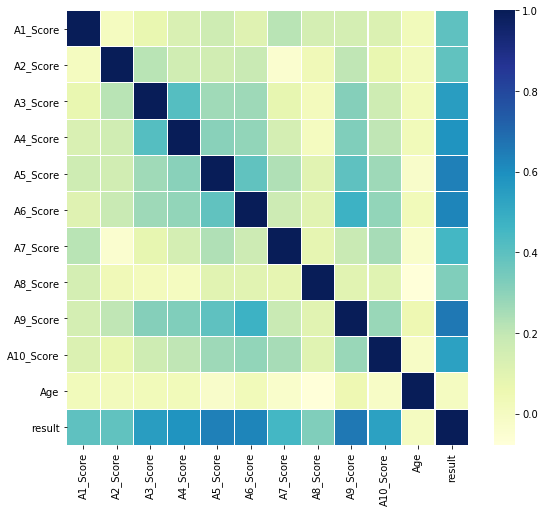

In [150]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


###### Categorical to numeric

In [151]:
data['gender'] = data['gender'].map({'m':1,'f':0})

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
Age                699 non-null float64
gender             699 non-null int64
ethnicity          699 non-null object
jundice            699 non-null object
austim             699 non-null object
contry_of_res      699 non-null object
used_app_before    699 non-null object
result             699 non-null int64
age_desc           699 non-null object
relation           699 non-null object
ASD                699 non-null object
dtypes: float64(1), int64(12), object(8)
memory usage: 120.1+ KB


In [153]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,0,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,0,White-European,no,no,Egypt,no,2,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,...,1,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,0,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,1,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,1,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,1,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


In [154]:
data['jundice'] = data['jundice'].map({'yes':1,'no':0})

In [155]:
data['austim']=data['austim'].map({'yes':1,'no':0})

In [156]:
data['used_app_before']=data['used_app_before'].map({'yes':1,'no':0})

In [157]:
data['ASD']=data['ASD'].map({'YES':1,'NO':0})

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
Age                699 non-null float64
gender             699 non-null int64
ethnicity          699 non-null object
jundice            699 non-null int64
austim             699 non-null int64
contry_of_res      699 non-null object
used_app_before    699 non-null int64
result             699 non-null int64
age_desc           699 non-null object
relation           699 non-null object
ASD                699 non-null int64
dtypes: float64(1), int64(16), object(4)
memory usage: 120.1+ KB


In [159]:
#dropping age_desc because it is of no use
data.drop(['age_desc'], axis=1, inplace=True)
data.drop(['contry_of_res'], axis=1, inplace=True)
data.drop(['ethnicity'], axis=1, inplace=True)


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 18 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
Age                699 non-null float64
gender             699 non-null int64
jundice            699 non-null int64
austim             699 non-null int64
used_app_before    699 non-null int64
result             699 non-null int64
relation           699 non-null object
ASD                699 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 103.8+ KB


In [161]:
data['relation']=data['relation'].map({'Self':10,'Parent':9, 'Relative':8, 'Others':7, 'Health care professional':6})

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 18 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
Age                699 non-null float64
gender             699 non-null int64
jundice            699 non-null int64
austim             699 non-null int64
used_app_before    699 non-null int64
result             699 non-null int64
relation           695 non-null float64
ASD                699 non-null int64
dtypes: float64(2), int64(16)
memory usage: 103.8 KB


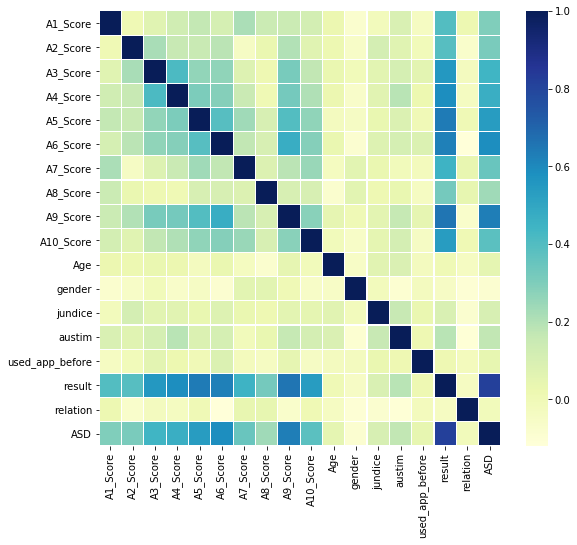

In [163]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [164]:
data.drop(['relation'], axis=1, inplace=True)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 17 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
Age                699 non-null float64
gender             699 non-null int64
jundice            699 non-null int64
austim             699 non-null int64
used_app_before    699 non-null int64
result             699 non-null int64
ASD                699 non-null int64
dtypes: float64(1), int64(16)
memory usage: 98.3 KB


In [166]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,gender,jundice,austim,used_app_before,result,ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,8,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,0


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
Y = data.ASD
X = data.drop('ASD', axis=1)

In [169]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,gender,jundice,austim,used_app_before,result
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,5
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,8
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [171]:
X_train.shape

(559, 16)

In [172]:
X_test.shape

(140, 16)

In [173]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [174]:
predictions=logmodel.predict(X_test)


In [175]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [176]:
data1 = {'ASD_pred': predictions}
df2 = pd.DataFrame(data=data1)

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,df2.ASD_pred)

array([[99,  1],
       [ 2, 38]], dtype=int64)

In [179]:
logmodel.score(X_test, y_test)

0.9785714285714285

In [181]:
log_predict_proba = logmodel.predict_proba(X_test)``

In [183]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [184]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, predictions) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test,predictions ) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, predictions))


Logistic Regression Accuracy: 97.86%
Logistic Regression AUC: 97.00%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.97      0.95      0.96        40

   micro avg       0.98      0.98      0.98       140
   macro avg       0.98      0.97      0.97       140
weighted avg       0.98      0.98      0.98       140

